In [120]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import cv2
import itertools  
import pickle

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.applications import VGG16 
from keras.applications import VGG19
from keras.layers import Activation, Dense,Flatten,Dropout
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import TensorBoard
from keras.optimizers import SGD, Adam

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [121]:


NAME = "CNN-second-dataset-balance-15epochs-one-dropout-3cov2d-x200"

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

IMAGE_SIZE=200

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

one_hot_labels = keras.utils.to_categorical(y, num_classes=3)

In [122]:
base_model = VGG16(weights='imagenet',input_shape=(224,224,3))

In [123]:
optimizer = Adam(lr=0.0001)
model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [124]:
feature = model.predict(X,verbose=1)
#verbose: Integer. 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#verbose 0, 1 or 2 you just say  how do you want to 'see' the training progress for each epoch.
#0 will show you nothing (silent)
#1 will show you an animated progress bar like this: progres_bar
#2 will just mention the number of epoch like this:epoch 1/10


180/180 [==============================] - 97s 540ms/step


In [125]:
print(feature)

[[0.         0.9746308  0.         ... 0.         1.1823658  0.22407988]
 [0.         0.96873194 0.         ... 0.         1.3126771  0.4217513 ]
 [0.         1.2340822  0.         ... 0.         1.1477022  0.32527655]
 ...
 [0.         1.2747127  0.         ... 0.         1.2603393  0.4187177 ]
 [0.         1.2303388  0.         ... 0.         1.5331701  0.        ]
 [0.         1.0652885  0.         ... 0.         1.4534949  0.17440271]]


In [218]:
X_train, X_test, y_train, y_test = train_test_split(feature,y,test_size=0.1,shuffle=True)
# the default test_size=0.25

In [219]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [220]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print("accuracy of : ",acc)

accuracy of :  0.5


AttributeError: 'list' object has no attribute 'ravel'

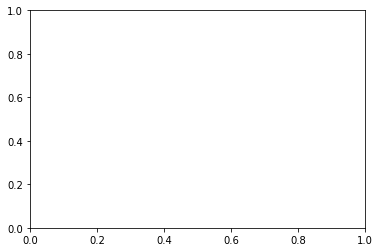

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, sub = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.set_xlim(xx.min(), xx.max())
plt.set_ylim(yy.min(), yy.max())
plt.set_xlabel('Sepal length')
plt.set_ylabel('Sepal width')
plt.set_xticks(())
plt.set_yticks(())
plt.set_title("plot")

plt.show()

In [98]:
len(X)

200

In [99]:
len(y)

200